In [1]:
# primero nuestras librerias!

# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd

# Visualización
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

In [5]:
# lo primero que hacemos es cargar el dataframe que vamos a usar para esta lección
df = pd.read_csv("files/world_data_full_apply_nulos.csv", index_col=0) 
df.head(2)

,country,density,abbreviation,agricultural_land,land_area,armed_forces_size,birth_rate,calling_code,capital/major_city,co2-emissions,cpi,cpi_change,currency-code,fertility_rate,forested_area,gasoline_price,gdp,gross_primary_education_enrollment,gross_tertiary_education_enrollment,infant_mortality,largest_city,life_expectancy,maternal_mortality_ratio,minimum_wage,official_language,out_of_pocket_health_expenditure,physicians_per_thousand,population,population_labor_force_participation,tax_revenue,total_tax_rate,unemployment_rate,urban_population,latitude,longitude,continent
0,Afghanistan,60.0,AF,58.1,652.230,323.0,32.49,93.0,Kabul,8.672,149.90,2.3,AFN,4.47,2.1,0.70,1.910135e+10,104.0,9.7,47.9,Kabul,64.5,638.0,0.43,Pashto,78.4,0.28,NaN,48.9,9.3,71.4,11.12,NaN,33.939110,67.709953,Asia
1,Albania,105.0,AL,43.1,28.748,9.0,11.78,355.0,Tirana,4.536,119.05,1.4,ALL,1.62,28.1,1.36,1.527808e+10,107.0,55.0,7.8,Tirana,78.5,15.0,1.12,Albanian,56.9,1.20,NaN,55.7,18.6,36.6,12.33,NaN,41.153332,20.168331,Europe


1. ¿Cómo se distribuye la tasa de natalidad en el conjunto de datos? ¿Hay algún patrón evidente?

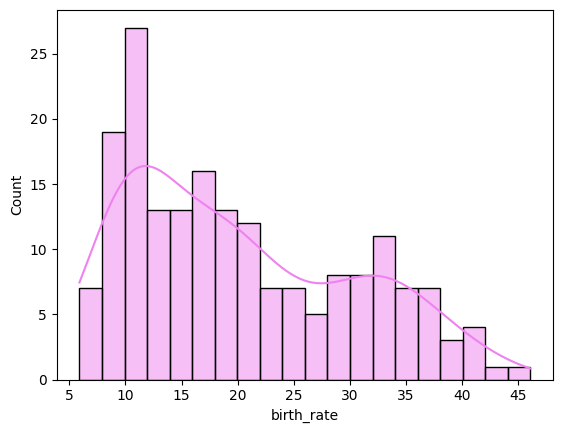

In [6]:
sns.histplot(x = "birth_rate", 
             data = df, 
             color = "violet", 
             kde = True, 
             bins = 20 );

# sin relacionarlo con otra variable no nos da una información de tendencia ni patrón evidente. 

2. ¿Existe una relación aparente entre la tasa de mortalidad infantil y la esperanza de vida? Proporciona una breve descripción de los patrones que observes.

In [ ]:
df.columns

<Axes: xlabel='infant_mortality', ylabel='life_expectancy'>

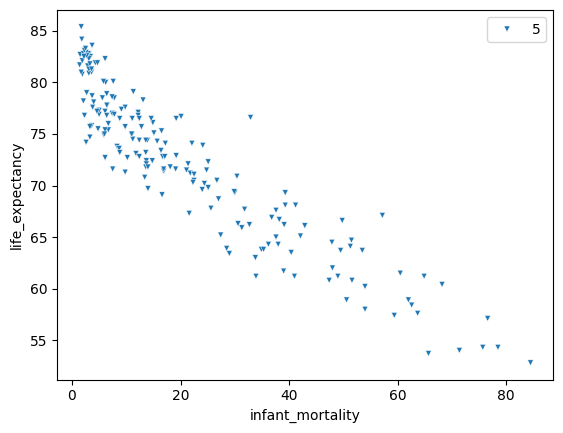

In [12]:
sns.scatterplot(x = "infant_mortality", 
                y = "life_expectancy", 
                data = df, 
                size = 5, 
                marker= "v")

Text(0.5, 1.0, 'Relación entre esperanza de vida y mortalidad infantil')

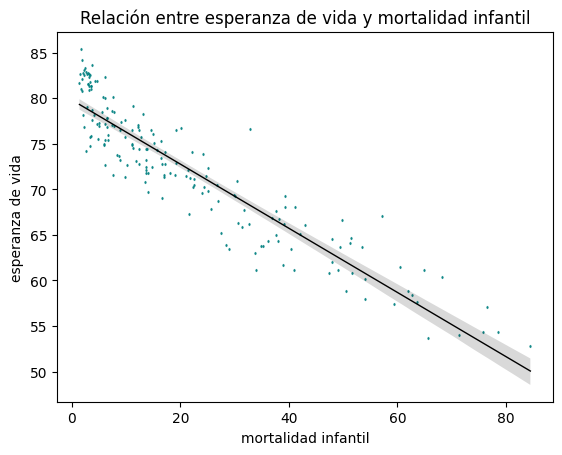

In [13]:
sns.regplot(x = "infant_mortality", 
                y = "life_expectancy",
            data = df, 
            marker = "d", 
            line_kws = {"color": "black", "linewidth": 1}, # cambiamos el color y el grosor de la linea de tendencia
            scatter_kws = {"color": "teal", "s": 1} # cambiamos el color y el tamaño de los puntos del scaterplot
            )

# cambiamos los nombres de los ejes como hemos estado haciendo hasta ahora
plt.xlabel("mortalidad infantil")
plt.ylabel("esperanza de vida")

# ponemos título a la gráfica
plt.title("Relación entre esperanza de vida y mortalidad infantil")


In [ ]:
# como la linea es descendente interpretamos que hay una alta esperanza de vida y una baja mortalidad infantil

3. ¿Cuál es el continente con la mayor cantidad de países en el conjunto de datos? Proporciona el porcentaje de países en ese continente.

In [17]:
df_conteo = df["continent"].value_counts().reset_index()
df_conteo

,continent,count
0,Africa,53
1,Europe,47
2,Asia,45
3,Central America,20
4,Oceania,14
5,South America,13
6,North America,2


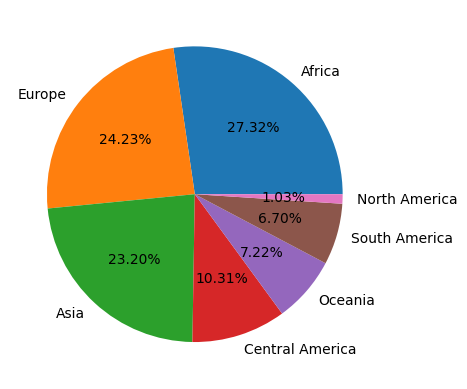

In [20]:
plt.pie("count", labels="continent", data=df_conteo, autopct=  '%1.2f%%');

4. ¿Cuál es la mediana de la esperanza de vida en Europa? Proporciona un rango intercuartil aproximado y verifica si existen valores atípicos.

In [26]:
df[df["continent"]== "Europe"].head(2)

,country,density,abbreviation,agricultural_land,land_area,armed_forces_size,birth_rate,calling_code,capital/major_city,co2-emissions,cpi,cpi_change,currency-code,fertility_rate,forested_area,gasoline_price,gdp,gross_primary_education_enrollment,gross_tertiary_education_enrollment,infant_mortality,largest_city,life_expectancy,maternal_mortality_ratio,minimum_wage,official_language,out_of_pocket_health_expenditure,physicians_per_thousand,population,population_labor_force_participation,tax_revenue,total_tax_rate,unemployment_rate,urban_population,latitude,longitude,continent
1,Albania,105.0,AL,43.1,28.748,9.0,11.78,355.0,Tirana,4.536,119.05,1.4,ALL,1.62,28.1,1.36,1.527808e+10,107.0,55.0,7.8,Tirana,78.5,15.0,1.12,Albanian,56.9,1.20,NaN,55.7,18.6,36.6,12.33,NaN,41.153332,20.168331,Europe
3,Andorra,164.0,AD,40.0,468.000,NaN,7.20,376.0,Andorra la Vella,469.000,NaN,NaN,EUR,1.27,34.0,1.51,3.154058e+09,106.4,NaN,2.7,Andorra la Vella,NaN,NaN,6.63,Catalan,36.4,3.33,77.142,NaN,NaN,NaN,NaN,67.873,42.506285,1.521801,Europe


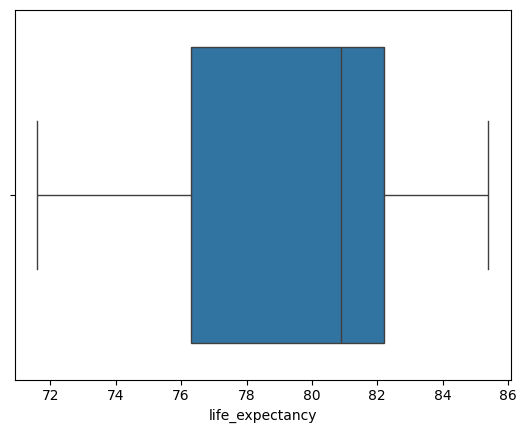

In [25]:
sns.boxplot(x= "life_expectancy", data = df[df["continent"]== "Europe"]);

#la mediana es 81 años y no hay valores atípicos

5. ¿Existen relaciones visibles entre la tasa de natalidad y las siguientes variables: tasa de mortalidad infantil, esperanza de vida, densidad de población y población urbana? Usa un subplot. Describe cualquier patrón que encuentres.

In [27]:
df.columns

Index(['country', 'density', 'abbreviation', 'agricultural_land', 'land_area',
       'armed_forces_size', 'birth_rate', 'calling_code', 'capital/major_city',
       'co2-emissions', 'cpi', 'cpi_change', 'currency-code', 'fertility_rate',
       'forested_area', 'gasoline_price', 'gdp',
       'gross_primary_education_enrollment',
       'gross_tertiary_education_enrollment', 'infant_mortality',
       'largest_city', 'life_expectancy', 'maternal_mortality_ratio',
       'minimum_wage', 'official_language', 'out_of_pocket_health_expenditure',
       'physicians_per_thousand', 'population',
       'population_labor_force_participation', 'tax_revenue', 'total_tax_rate',
       'unemployment_rate', 'urban_population', 'latitude', 'longitude',
       'continent'],
      dtype='object')

Text(0.5, 1.0, 'tasa de natalidad y población urbana')

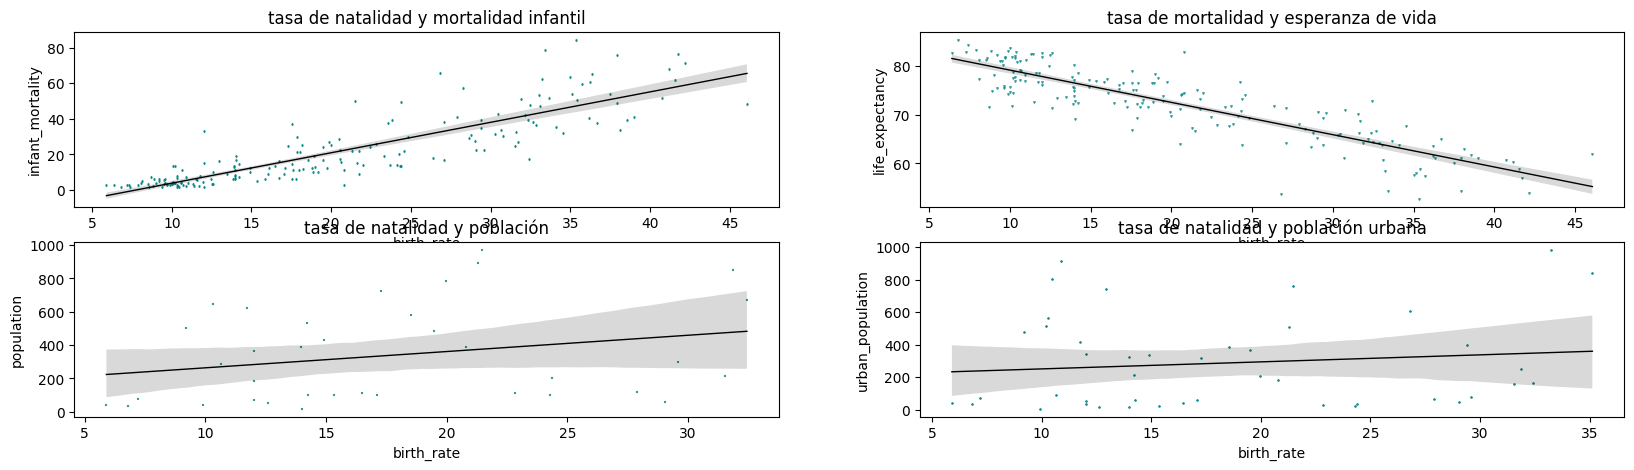

In [36]:
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (20, 5))

# añadimos un boxplot usando el método 'sns.boxplot()'
sns.regplot(x = "birth_rate", 
            y = "infant_mortality", 
            data = df, 
            marker = "d", 
            line_kws = {"color": "black", "linewidth": 1}, # cambiamos el color y el grosor de la linea de tendencia
            scatter_kws = {"color": "teal", "s": 1}, # cambiamos el color y el tamaño de los puntos del scaterplot
            ax = axes[0, 0])

# añadimos un título a esta primera gráfica usando el método '.set_title()
axes[0,0].set_title("tasa de natalidad y mortalidad infantil")


# CREAMOS EL VIOLINPLOT USANDO SEABORN
# añadimos un violinplot usando el método 'sns.violinplot()'. COMO ES SEABORN, USAMOS EL PARÁMETRO 'ax' PARA INDICAR EN QUE EJE DE LA FIGURA LO QUEREMOS 
sns.regplot(x = "birth_rate", 
            y = "life_expectancy", 
            data = df, 
            marker = "v", 
            line_kws = {"color": "black", "linewidth": 1}, # cambiamos el color y el grosor de la linea de tendencia
            scatter_kws = {"color": "teal", "s": 1}, # cambiamos el color y el tamaño de los puntos del scaterplot
            ax = axes[0, 1])

# añadimos un título a esta primera gráfica usando el método '.set_title()
axes[0,1].set_title("tasa de mortalidad y esperanza de vida")

sns.regplot(x = "birth_rate", 
            y = "population", 
            data = df, 
            marker = "+", 
            line_kws = {"color": "black", "linewidth": 1}, # cambiamos el color y el grosor de la linea de tendencia
            scatter_kws = {"color": "teal", "s": 1}, # cambiamos el color y el tamaño de los puntos del scaterplot
            ax = axes[1,0 ])

axes[1,0].set_title("tasa de natalidad y población")

sns.regplot(x = "birth_rate", 
            y = "urban_population", 
            data = df, 
            marker = "*", 
            line_kws = {"color": "black", "linewidth": 1}, # cambiamos el color y el grosor de la linea de tendencia
            scatter_kws = {"color": "teal", "s": 1}, # cambiamos el color y el tamaño de los puntos del scaterplot
            ax = axes[1,1])

axes[1,1].set_title("tasa de natalidad y población urbana")

